### Conditions description:
<ul>
    <li>C1 = low interference, easy search</li>
    <li>C2 = low interference, hard search</li>
    <li>C3 = high interference, easy search</li>
    <li>C4 = high interference, hard search</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from matplotlib import colors as clrs

import nilearn
from nilearn import datasets
from nilearn import surface
from nilearn import plotting 
from nilearn.image import concat_imgs, mean_img
from mne.stats import fdr_correction

from visbrain.gui import Brain
from visbrain.objects import SourceObj, BrainObj, ColorbarObj, SceneObj
from visbrain.io import download_file, read_stc



/Users/RaulAlvarez/opt/anaconda3/envs/py36/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


## Load data and compute mean across conditions


In [2]:
# Paths to access files
home_dir = "DistractWM/"
c1_pc_path = "/graph_metrics/pc_cond1_space.npy"
c2_pc_path = "/graph_metrics/pc_cond2_space.npy"
c3_pc_path = "/graph_metrics/pc_cond3_space.npy"
c4_pc_path = "/graph_metrics/pc_cond4_space.npy"

c1_wcs_path = "/graph_metrics/wcs_cond1_space.npy"
c2_wcs_path = "/graph_metrics/wcs_cond2_space.npy"
c3_wcs_path = "/graph_metrics/wcs_cond3_space.npy"
c4_wcs_path = "/graph_metrics/wcs_cond4_space.npy"

# ...
idx = 31 #102-132, total 27 participants (missing 111, 113, 127 and 128)

columns = ['S-102', 'S-103', 'S-104', 'S-105', 'S-106', 
          'S-107', 'S-108', 'S-109', 'S-110', 'S-112',
          'S-114', 'S-115', 'S-116', 'S-117', 'S-118',
          'S-119', 'S-120', 'S-121', 'S-122', 'S-123',
          'S-124', 'S-125', 'S-126', 'S-129', 'S-130',
          'S-131', 'S-132']

# Creat psudo-empty dataframe
c1_pc1_df = pd.DataFrame()
c2_pc1_df = pd.DataFrame()
c3_pc1_df = pd.DataFrame()
c4_pc1_df = pd.DataFrame()

c1_wcs1_df = pd.DataFrame()
c2_wcs1_df = pd.DataFrame()
c3_wcs1_df = pd.DataFrame()
c4_wcs1_df = pd.DataFrame()

c1_pc2_df = pd.DataFrame()
c2_pc2_df = pd.DataFrame()
c3_pc2_df = pd.DataFrame()
c4_pc2_df = pd.DataFrame()

c1_wcs2_df = pd.DataFrame()
c2_wcs2_df = pd.DataFrame()
c3_wcs2_df = pd.DataFrame()
c4_wcs2_df = pd.DataFrame()

for x in range(idx): 
    
    name = 'sub-'
    num = 102 + x
    
    """Omitting participant 103 because Nan input"""
    if(not((num == 103) or (num == 111) or (num == 113) or (num == 127) or (num == 128))):
        
        name = name + str(num)
        full_pc_path1 = home_dir + name + c1_pc_path
        full_pc_path2 = home_dir + name + c2_pc_path
        full_pc_path3 = home_dir + name + c3_pc_path
        full_pc_path4 = home_dir + name + c4_pc_path
        
        full_wcs_path1 = home_dir + name + c1_wcs_path
        full_wcs_path2 = home_dir + name + c2_wcs_path
        full_wcs_path3 = home_dir + name + c3_wcs_path
        full_wcs_path4 = home_dir + name + c4_wcs_path
        
        # Loading data     
        pc_c1 = np.load(full_pc_path1) 
        pc_c2 = np.load(full_pc_path2) 
        pc_c3 = np.load(full_pc_path3) 
        pc_c4 = np.load(full_pc_path4) 
        
        wcs_c1 = np.load(full_wcs_path1) 
        wcs_c2 = np.load(full_wcs_path2) 
        wcs_c3 = np.load(full_wcs_path3) 
        wcs_c4 = np.load(full_wcs_path4) 
        
        # 1st Score
        c1_pc1_mean = pc_c1[0, :] 
        c2_pc1_mean = pc_c2[0, :] 
        c3_pc1_mean = pc_c3[0, :] 
        c4_pc1_mean = pc_c4[0, :] 
        
        c1_wcs1_mean = wcs_c1[0, :] 
        c2_wcs1_mean = wcs_c2[0, :] 
        c3_wcs1_mean = wcs_c3[0, :] 
        c4_wcs1_mean = wcs_c4[0, :] 
        
        # 2nd Score
        c1_pc2_mean = pc_c1[1, :] 
        c2_pc2_mean = pc_c2[1, :] 
        c3_pc2_mean = pc_c3[1, :] 
        c4_pc2_mean = pc_c4[1, :] 
        
        c1_wcs2_mean = wcs_c1[1, :] 
        c2_wcs2_mean = wcs_c2[1, :] 
        c3_wcs2_mean = wcs_c3[1, :] 
        c4_wcs2_mean = wcs_c4[1, :] 
        
        # Appending data to df (1st Scores)
        c1_pc1_df[name] = c1_pc1_mean
        c2_pc1_df[name] = c2_pc1_mean
        c3_pc1_df[name] = c3_pc1_mean
        c4_pc1_df[name] = c4_pc1_mean
        
        c1_wcs1_df[name] = c1_wcs1_mean
        c2_wcs1_df[name] = c2_wcs1_mean
        c3_wcs1_df[name] = c3_wcs1_mean
        c4_wcs1_df[name] = c4_wcs1_mean
        
         # Appending data to df (2nd Scores)
        c1_pc2_df[name] = c1_pc2_mean
        c2_pc2_df[name] = c2_pc2_mean
        c3_pc2_df[name] = c3_pc2_mean
        c4_pc2_df[name] = c4_pc2_mean
        
        c1_wcs2_df[name] = c1_wcs2_mean
        c2_wcs2_df[name] = c2_wcs2_mean
        c3_wcs2_df[name] = c3_wcs2_mean
        c4_wcs2_df[name] = c4_wcs2_mean

             
print("c1_pc1_df shape: " + str(c1_pc1_df.shape))
print("c2_pc1_df shape: " + str(c2_pc1_df.shape))
print("c3_pc1_df shape: " + str(c3_pc1_df.shape))
print("c4_pc1_df shape: " + str(c4_pc1_df.shape))

print("c1_wcs1_df shape: " + str(c1_wcs1_df.shape))
print("c2_wcs1_df shape: " + str(c2_wcs1_df.shape))
print("c3_wcs1_df shape: " + str(c3_wcs1_df.shape))
print("c4_wcs1_df shape: " + str(c4_wcs1_df.shape))

print("\nc1_pc2_df shape: " + str(c1_pc2_df.shape))
print("c2_pc2_df shape: " + str(c2_pc2_df.shape))
print("c3_pc2_df shape: " + str(c3_pc2_df.shape))
print("c4_pc2_df shape: " + str(c4_pc2_df.shape))

print("c1_wcs2_df shape: " + str(c1_wcs2_df.shape))
print("c2_wcs2_df shape: " + str(c2_wcs2_df.shape))
print("c3_wcs2_df shape: " + str(c3_wcs2_df.shape))
print("c4_wcs2_df shape: " + str(c4_wcs2_df.shape))

c1_pc1_df shape: (400, 26)
c2_pc1_df shape: (400, 26)
c3_pc1_df shape: (400, 26)
c4_pc1_df shape: (400, 26)
c1_wcs1_df shape: (400, 26)
c2_wcs1_df shape: (400, 26)
c3_wcs1_df shape: (400, 26)
c4_wcs1_df shape: (400, 26)

c1_pc2_df shape: (400, 26)
c2_pc2_df shape: (400, 26)
c3_pc2_df shape: (400, 26)
c4_pc2_df shape: (400, 26)
c1_wcs2_df shape: (400, 26)
c2_wcs2_df shape: (400, 26)
c3_wcs2_df shape: (400, 26)
c4_wcs2_df shape: (400, 26)


In [3]:
# Sample of created dataframes
c1_pc1_df.head(10)

,sub-102,sub-104,sub-105,sub-106,sub-107,sub-108,sub-109,sub-110,sub-112,sub-114,...,sub-121,sub-122,sub-123,sub-124,sub-125,sub-126,sub-129,sub-130,sub-131,sub-132
0,0.079231,0.000000,0.636253,0.124468,0.553505,0.496839,0.499007,0.257250,0.226316,0.312394,...,0.000000,0.000000,0.671996,0.149731,0.103255,0.000000,0.615968,0.210600,0.160680,0.143700
1,0.066906,0.178491,0.525747,0.069275,0.310011,0.386390,0.403044,0.145963,0.000000,0.665521,...,0.000000,0.365053,0.377947,0.043272,0.000000,0.000000,0.512645,0.062177,0.098123,0.030831
2,0.086963,0.000000,0.085957,0.274693,0.173926,0.000000,0.271800,0.117588,0.232108,0.144397,...,0.000000,0.446586,0.501470,0.034346,0.499298,0.000000,0.190670,0.226014,0.290076,0.000000
3,0.090054,0.129650,0.186969,0.540893,0.272968,0.083459,0.000000,0.170138,0.509700,0.531216,...,0.000000,0.372456,0.658672,0.051729,0.263752,0.000000,0.000000,0.127779,0.186678,0.172957
4,0.070997,0.000000,0.000000,0.190723,0.243795,0.000000,0.000000,0.074553,0.000000,0.141283,...,0.000000,0.000000,0.529345,0.000000,0.000000,0.000000,0.306929,0.000000,0.128083,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.500755,0.000000,0.000000,0.000000,0.234072,0.312735,...,0.000000,0.000000,0.653216,0.000000,0.517609,0.000000,0.615147,0.158622,0.000000,0.234029
6,0.431090,0.485698,0.191655,0.526041,0.298491,0.493222,0.192453,0.000000,0.114091,0.000000,...,0.000000,0.000000,0.518713,0.000000,0.486115,0.000000,0.210307,0.206197,0.130664,0.000000
7,0.196932,0.320214,0.456981,0.382256,0.673598,0.295655,0.250437,0.181963,0.743974,0.714017,...,0.665207,0.000000,0.454852,0.000000,0.292196,0.710043,0.596052,0.356950,0.382033,0.441718
8,0.000000,0.133635,0.000000,0.257313,0.000000,0.071885,0.499908,0.000000,0.000000,0.414863,...,0.000000,0.000000,0.630897,0.000000,0.000000,0.000000,0.263568,0.052097,0.000000,0.000000
9,0.000000,0.198987,0.429985,0.521894,0.652081,0.176056,0.414525,0.042166,0.657556,0.507192,...,0.000000,0.000000,0.491175,0.000000,0.272286,0.357281,0.719548,0.328551,0.000000,0.080203


## Computing Low/High Interference data 

In [4]:
PC1_LowInt = (c1_pc1_df + c2_pc1_df)/2
PC1_HighInt = (c3_pc1_df + c4_pc1_df)/2
print("PC1_LowInt shape: " + str(PC1_LowInt.shape))
print("PC1_HighInt shape: " + str(PC1_HighInt.shape))


WCS1_LowInt = (c1_wcs1_df + c2_wcs1_df)/2
WCS1_HighInt = (c3_wcs1_df + c4_wcs1_df)/2
print("\nWCS1_LowInt shape: " + str(WCS1_LowInt.shape))
print("WCS1_HighInt shape: " + str(WCS1_HighInt.shape))

PC2_LowInt = (c1_pc2_df + c2_pc2_df)/2
PC2_HighInt = (c3_pc2_df + c4_pc2_df)/2
print("\nPC2_LowInt shape: " + str(PC2_LowInt.shape))
print("PC2_HighInt shape: " + str(PC2_HighInt.shape))


WCS2_LowInt = (c1_wcs2_df + c2_wcs2_df)/2
WCS2_HighInt = (c3_wcs2_df + c4_wcs2_df)/2
print("\nWCS2_LowInt shape: " + str(WCS2_LowInt.shape))
print("WCS2_HighInt shape: " + str(WCS2_HighInt.shape))

PC1_LowInt shape: (400, 26)
PC1_HighInt shape: (400, 26)

WCS1_LowInt shape: (400, 26)
WCS1_HighInt shape: (400, 26)

PC2_LowInt shape: (400, 26)
PC2_HighInt shape: (400, 26)

WCS2_LowInt shape: (400, 26)
WCS2_HighInt shape: (400, 26)


## Run t-tests

In [5]:
from scipy.stats import ttest_rel, normaltest

# Extract labels 
par_data = pd.read_csv("Parcellations/MNI/Centroid_coordinates/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv")
labels = np.array(par_data["ROI Name"]).reshape(400, 1)

def run_ttest_and_fdr(data1, data2, name2save):
    
    data1 = np.array(data1)
    data2 = np.array(data2)

    results = np.zeros((400, 5))

    for x in range(400):
        
         # Calculate paired-sample two-tailed t-test
        results[x, 0], results[x, 1] = ttest_rel(data1[x, :], data2[x, :], nan_policy="omit", alternative="two-sided")
        
        if(0.05 > results[x, 1]):
            results[x, 2] = True
        else:
            results[x, 2] = False    
    
    # Calculate false discovery rate (fdr) Benjamini/Hochberg
    results[:, 4], results[:, 3] = fdr_correction(results[:, 1], alpha=0.05, method='indep')
    
    # Append results to DataFrame
    results_df = pd.DataFrame(results, columns=["t_statistic", "p_val", "rej_null(x<0.05)", "corrected_p_val", "fdr_rej_null(x<0.05)"])
    results_df["label"] = labels      
    #path = str("GitHub/Summer_2021_fMRI/t_tests_csv/1st_score/t_test_PC&WCS_DifferencesBetweenConditions" + name2save + ".csv")
    #results_df.to_csv(path, sep='\t')
    
    return results_df

In [6]:
PC1_LowHighInt = run_ttest_and_fdr(PC1_LowInt, PC1_HighInt, "PC1_LowHighInt")
print("PC1_LowHighInt shape: " + str(PC1_LowHighInt.shape))

WCS1_LowHighInt = run_ttest_and_fdr(WCS1_LowInt, WCS1_HighInt, "WCS1_LowHighInt")
print("WCS1_LowHighInt shape: " + str(WCS1_LowHighInt.shape))

PC2_LowHighInt = run_ttest_and_fdr(PC2_LowInt, PC2_HighInt, "PC2_LowHighInt")
print("\nPC2_LowHighInt shape: " + str(PC2_LowHighInt.shape))

WCS2_LowHighInt = run_ttest_and_fdr(WCS2_LowInt, WCS2_HighInt, "WCS2_LowHighInt")
print("WCS2_LowHighInt shape: " + str(WCS2_LowHighInt.shape))


PC1_LowHighInt shape: (400, 6)
WCS1_LowHighInt shape: (400, 6)

PC2_LowHighInt shape: (400, 6)
WCS2_LowHighInt shape: (400, 6)


In [7]:
PC1_LowHighInt[PC1_LowHighInt["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
40,2.127719,0.043402,1.0,0.583438,0.0,7Networks_LH_SomMot_10
42,2.177737,0.039069,1.0,0.583438,0.0,7Networks_LH_SomMot_12
50,-2.520525,0.018471,1.0,0.583438,0.0,7Networks_LH_SomMot_20
56,-2.329493,0.028207,1.0,0.583438,0.0,7Networks_LH_SomMot_26
60,-3.264884,0.003168,1.0,0.316825,0.0,7Networks_LH_SomMot_30
63,-2.134121,0.042824,1.0,0.583438,0.0,7Networks_LH_SomMot_33
66,-2.303496,0.029847,1.0,0.583438,0.0,7Networks_LH_SomMot_36
71,-2.267350,0.032271,1.0,0.583438,0.0,7Networks_LH_DorsAttn_Post_4
77,2.595145,0.015597,1.0,0.583438,0.0,7Networks_LH_DorsAttn_Post_10
93,-2.486958,0.019917,1.0,0.583438,0.0,7Networks_LH_SalVentAttn_ParOper_3


In [8]:
WCS1_LowHighInt[WCS1_LowHighInt["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
3,-2.400248,0.024153,1.0,0.625808,0.0,7Networks_LH_Vis_4
50,-2.508821,0.018964,1.0,0.625808,0.0,7Networks_LH_SomMot_20
56,2.423738,0.022930,1.0,0.625808,0.0,7Networks_LH_SomMot_26
60,2.501926,0.019260,1.0,0.625808,0.0,7Networks_LH_SomMot_30
63,-2.298970,0.030141,1.0,0.625808,0.0,7Networks_LH_SomMot_33
80,-2.403840,0.023962,1.0,0.625808,0.0,7Networks_LH_DorsAttn_Post_13
82,2.267831,0.032237,1.0,0.625808,0.0,7Networks_LH_DorsAttn_Post_15
83,2.275469,0.031711,1.0,0.625808,0.0,7Networks_LH_DorsAttn_Post_16
139,-2.327283,0.028343,1.0,0.625808,0.0,7Networks_LH_Cont_PFCl_6
145,-2.201054,0.037186,1.0,0.625808,0.0,7Networks_LH_Cont_Cing_1


In [9]:
PC2_LowHighInt[PC2_LowHighInt["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
0,-2.386923,0.024873,1.0,0.635916,0.0,7Networks_LH_Vis_1
1,-2.752338,0.010855,1.0,0.542740,0.0,7Networks_LH_Vis_2
2,-2.129351,0.043254,1.0,0.635916,0.0,7Networks_LH_Vis_3
22,-2.302120,0.029936,1.0,0.635916,0.0,7Networks_LH_Vis_23
50,-2.146115,0.041761,1.0,0.635916,0.0,7Networks_LH_SomMot_20
60,-2.495986,0.019518,1.0,0.635916,0.0,7Networks_LH_SomMot_30
66,-2.089097,0.047037,1.0,0.635916,0.0,7Networks_LH_SomMot_36
71,-2.097515,0.046222,1.0,0.635916,0.0,7Networks_LH_DorsAttn_Post_4
81,-2.109124,0.045120,1.0,0.635916,0.0,7Networks_LH_DorsAttn_Post_14
92,-2.586694,0.015900,1.0,0.589350,0.0,7Networks_LH_SalVentAttn_ParOper_2


In [10]:
WCS2_LowHighInt[WCS2_LowHighInt["rej_null(x<0.05)"] == 1]

,t_statistic,p_val,rej_null(x<0.05),corrected_p_val,fdr_rej_null(x<0.05),label
3,-2.903696,0.007601,1.0,0.606889,0.0,7Networks_LH_Vis_4
19,-2.607662,0.015158,1.0,0.606889,0.0,7Networks_LH_Vis_20
34,-2.181047,0.038797,1.0,0.796224,0.0,7Networks_LH_SomMot_4
50,-2.893724,0.007783,1.0,0.606889,0.0,7Networks_LH_SomMot_20
63,-2.475570,0.020431,1.0,0.628660,0.0,7Networks_LH_SomMot_33
100,-2.593428,0.015658,1.0,0.606889,0.0,7Networks_LH_SalVentAttn_FrOperIns_5
122,2.129639,0.043228,1.0,0.796224,0.0,7Networks_LH_Limbic_TempPole_5
139,-2.065450,0.049394,1.0,0.796224,0.0,7Networks_LH_Cont_PFCl_6
151,-2.874505,0.008146,1.0,0.606889,0.0,7Networks_LH_Default_Temp_4
158,2.736119,0.011273,1.0,0.606889,0.0,7Networks_LH_Default_Par_1


In [11]:
# No significant results for the multiple comparisons test
# However, it appears that there were more significant results for the uncorrected p-values

## Plot Statistics Results

### PC1 (LowHigh Interefence)

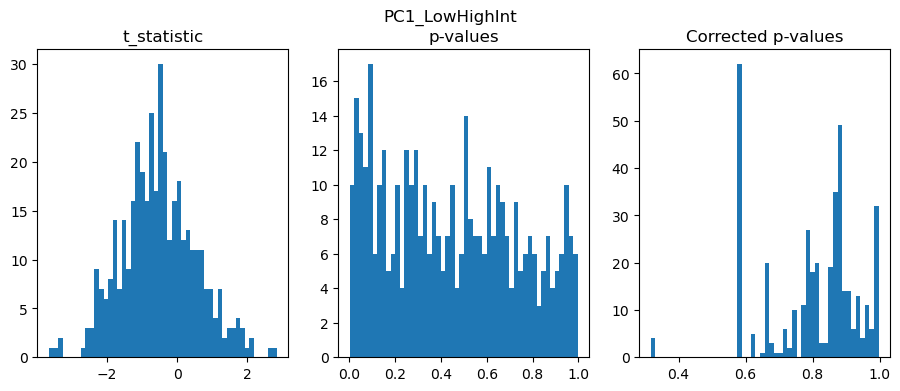

In [12]:
# Create function to plot results
def plot_stats(data, title):
    
    fig, axs = plt.subplots(1, 3, figsize=(11, 4))
    fig.suptitle(str(title))
    
    axs[0].hist(data["t_statistic"], bins=50)
    axs[0].set_title('t_statistic')
    
    axs[1].hist(data["p_val"], bins=50)
    axs[1].set_title('p-values')
    
    axs[2].hist(data["corrected_p_val"], bins=50)
    axs[2].set_title('Corrected p-values')
    
    plt.show()

plot_stats(PC1_LowHighInt, "PC1_LowHighInt")

### WCS (LowHigh Interference)

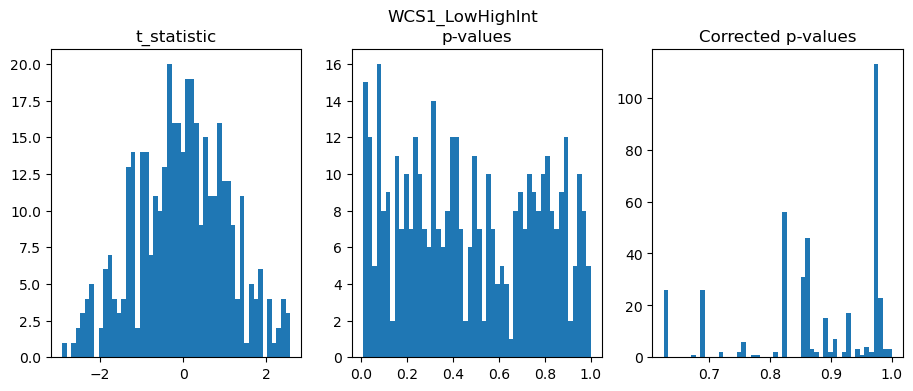

In [13]:
plot_stats(WCS1_LowHighInt, "WCS1_LowHighInt")

### PC2 (LowHigh Interference)


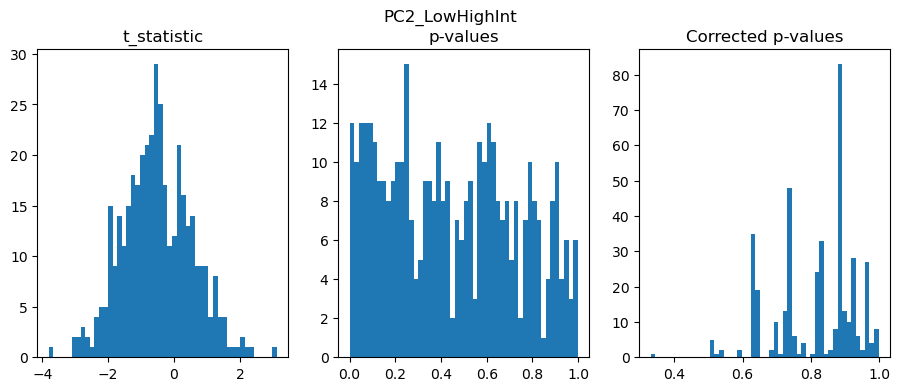

In [14]:
plot_stats(PC2_LowHighInt, "PC2_LowHighInt")

### WCS2 (LowHigh Interference)

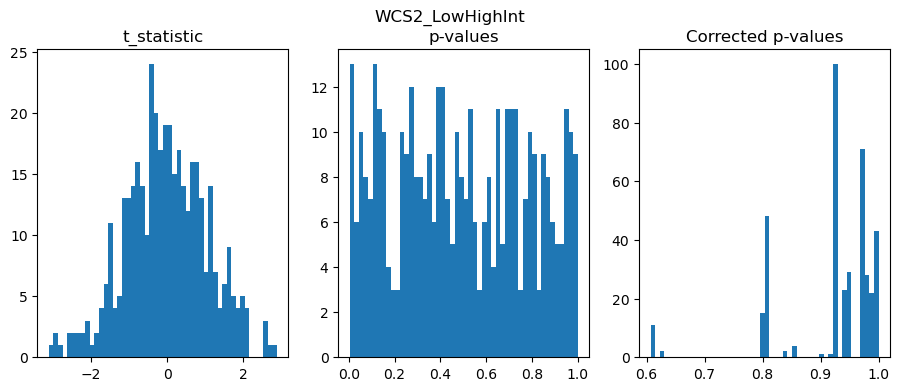

In [15]:
plot_stats(WCS2_LowHighInt, "WCS2_LowHighInt")

## Get coordinates from each node

In [16]:
# Get Schatlas info
# Get parcellation atlas from nilearn
atlas_file = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=17, resolution_mm=2)

# Visualize parcellation atlas
atlas_maps = atlas_file.maps

# Get coordinates and labels
# This coordinates work for (B1, B2, B3, white) surfaces
coordinates = plotting.find_parcellation_cut_coords(labels_img=atlas_maps, return_label_names=False)
print("coordinates shape: " + str(coordinates.shape))

coordinates_left = coordinates[0:200, :]
coordinates_right = coordinates[200:400, :]
print("coordinates_left shape: " + str(coordinates_left.shape))
print("coordinates_right shape: " + str(coordinates_right.shape))

B3_coords_df = pd.DataFrame(coordinates, columns=['x', 'y', 'z'])
B3_coords_df.head()

coordinates shape: (400, 3)
coordinates_left shape: (200, 3)
coordinates_right shape: (200, 3)


,x,y,z
0,-35.365696,-62.032362,-17.055016
1,-23.350588,-72.696471,-10.296471
2,-36.414566,-81.389356,-15.966387
3,-16.950000,-86.387500,-14.987500
4,-24.406780,-96.745763,-11.924670


In [17]:
# Edit coords 
fixed_coords_left = coordinates[0:200]
fixed_coords_left[0:200, 0] = fixed_coords_left[0:200, 0] + 5

fixed_coords_right = coordinates[200:400]
fixed_coords_right[0:200, 0] = fixed_coords_right[0:200, 0] - 5

print(fixed_coords_left.shape)

(200, 3)


## Useful functions

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def SaveImg_RemoveBackground(scene, name2save):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    pil_img.save(str(name2save), "PNG")
    
    return pil_img
    
def RemoveBackground(scene):

    scene_render = scene.render()

    pil_img = Image.fromarray(scene_render, mode='RGBA')
    datas = pil_img.getdata()

    newData = []

    for item in datas:
        if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
            # storing a transparent value when we find a black colour
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item) 

    pil_img.putdata(newData)
    
    return pil_img


In [19]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)    
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    norm_arr = np.array(norm_arr)
    return norm_arr

def z_scorer(data):
    
    data = np.array(data)
    data_c = data.copy()
    m = data.size
    
    # Apply maximum absolute scaling
    for x in range(m):
        data_c[x] = (data[x] - data.mean())/data.std()
        
    return data_c
        

def add_B3_to_scene(scene, data, coords, row, col, hemisphere, orientation):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = data
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
 
    # Create 'source object'    
    s_obj = SourceObj('SourceExample', coords, **kwargs) #color=colors,
    
    # Add color to nodes
    # Just for coloring purposes normalize data
    
    #normal_array = normalize(data, 0, 1)
    
    std_data =  z_scorer(data)
    
    s_obj.color_sources(data=std_data, cmap="viridis", vmax=std_data.max(), vmin=std_data.min(), clim=(std_data.min(), std_data.max()))

    # Create 'Brain object'
    b_obj = BrainObj('B3', hemisphere=hemisphere, translucent=False) 
    
    # Add objects to scene
    scene.add_to_subplot(s_obj, row=row, col=col, row_span=1, **KW) 
    scene.add_to_subplot(b_obj, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True)
   
    
def add_CB_to_scene(scene, data, row, col, cbtitle):
    # Add colorbar to scene
    data = z_scorer(data)
    cb_proj = ColorbarObj(s_obj, cblabel=cbtitle, cmap="viridis", cbtxtsz=15, txtsz=15., 
                          vmax=data.max(), vmin=data.min(), limtxt=False, width=.05, cbtxtsh=3.,  
                          rect=(-.3, -2., 1., 4), clim=(data.min(), data.max()))
    scene.add_to_subplot(cb_proj, row=row, col=col)

In [20]:
rbga_gray = clrs.to_rgba('gray')

def thres_colors(data):
    
    viridis = cm.get_cmap('viridis', 150)
    colors = viridis(data['t_statistic'])
    
    for x in range(data['t_statistic'].size):
        
        if(data["rej_null(x<0.05)"][x] == 0):
            
            colors[x] = rbga_gray
        else:
            colors[x] = colors[x]
            
    return colors  
        
    
def add_B3_to_scene_thrh1(scene, data, coords, row, col, hemisphere, orientation):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7

    # Add data
    kwargs['data'] = z_scorer(data["t_statistic"]) #data["t_statistic"]
    #kwargs['mask'] = data["rej_null(x<0.05)"]
    #kwargs['mask_color'] = 'gray'
    
    #un_sig = data[["rej_null(x<0.05)"] == 0]
    
    #kwargs['color'] = #'viridis'
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
     
    coloring = thres_colors(data)
    
    # Create 'source object'    
    s_obj = SourceObj('SourceExample', xyz=coords, color=coloring, **kwargs) #color=colors,
    
    # Add color to nodes
    # Just for coloring purposes normalize data
    
    #normal_array = normalize(data, 0, 1)
    
    #std_data = z_scorer(data["t_statistic"])
    
    #s_obj.color_sources(data=std_data, cmap="viridis", vmax=std_data.max(), vmin=std_data.min(), clim=(std_data.min(), std_data.max()))

    # Create 'Brain object'
    b_obj = BrainObj('B3', hemisphere=hemisphere, translucent=False) 
    
    # Add objects to scene
    scene.add_to_subplot(s_obj, row=row, col=col, row_span=1, **KW) 
    scene.add_to_subplot(b_obj, row=row, col=col, row_span=1, rotate=orientation, use_this_cam=True )
    
def add_B3_to_scene_thrh2(scene, data, coords):
    
    global kwargs, s_obj, b_obj
    # ... 
    kwargs = {}

    #
    kwargs['alpha'] = 0.7
    
    # Add data
    data_tstatistic = z_scorer(data["t_statistic"])
    kwargs['data'] = data_tstatistic[0:200]
    
    # Set the form and size of nodes
    kwargs['symbol'] = 'o' 
    kwargs['radius_min'] = 10                
    kwargs['radius_max'] = 10 
     
    coloring = thres_colors(data)
    
    # Create 'source object'    
    s_obj1 = SourceObj('SourceExample', xyz=coords[200:400], color=coloring[0:200], **kwargs) 
    
    # Add color to nodes
    # Just for coloring purposes normalize data
    
    #normal_array = normalize(data, 0, 1)
    
    #std_data = z_scorer(data["t_statistic"])
    
    #s_obj.color_sources(data=std_data, cmap="viridis", vmax=std_data.max(), vmin=std_data.min(), clim=(std_data.min(), std_data.max()))

    # Create 'Brain object'
    b_obj1 = BrainObj('B3', hemisphere='right', translucent=False) 
    
    # Add objects to scene
    scene.add_to_subplot(s_obj1, row=0, col=0, row_span=1, **KW) 
    scene.add_to_subplot(b_obj1, row=0, col=0, row_span=1, rotate='left', use_this_cam=True)
    
    # Add second object
    # Add data
    kwargs['data'] = data_tstatistic[200:400]
    
    # Create 'source object'    
    s_obj1 = SourceObj('SourceExample', xyz=coords[0:200], color=coloring[200:400], **kwargs)
    
    # Create 'Brain object'
    b_obj1 = BrainObj('B3', hemisphere='left', translucent=False) 
    
    # Add objects to scene
    scene.add_to_subplot(s_obj1, row=0, col=1, row_span=1, **KW) 
    scene.add_to_subplot(b_obj1, row=0, col=1, row_span=1, rotate='right', use_this_cam=True)


### Comparing normal t-statistic to z-scored t-statistic

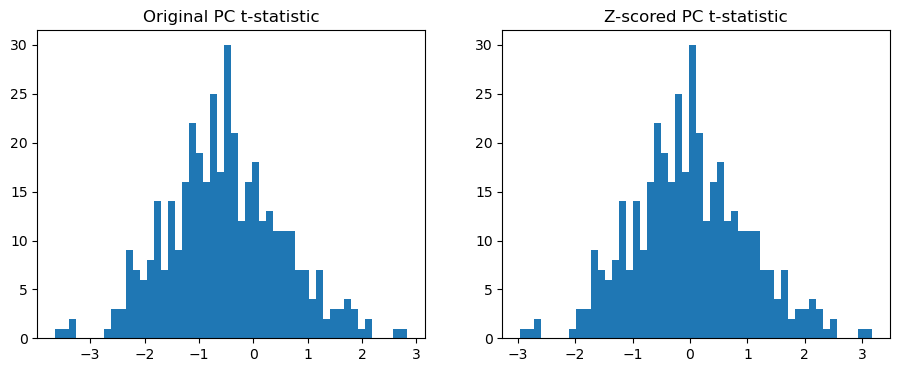

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
    
axs[0].hist(PC1_LowHighInt["t_statistic"], bins=50)
axs[0].set_title('Original PC t-statistic')
    
axs[1].hist(z_scorer(PC1_LowHighInt["t_statistic"]), bins=50)
axs[1].set_title('Z-scored PC t-statistic')
plt.show()

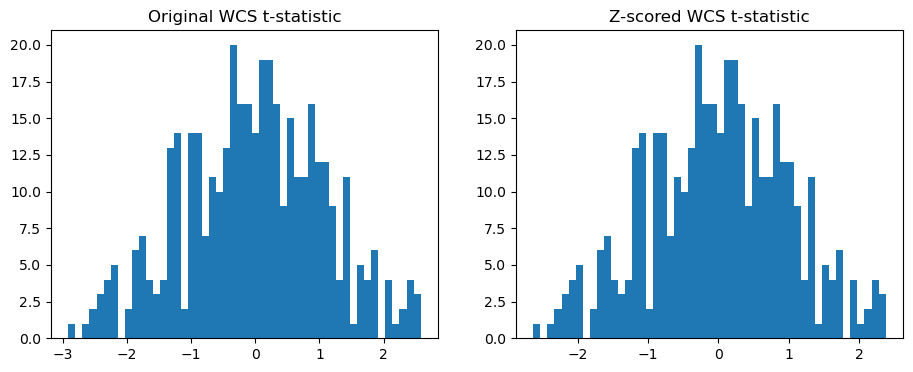

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(11, 4))
    
axs[0].hist(WCS1_LowHighInt["t_statistic"], bins=50)
axs[0].set_title('Original WCS t-statistic')
    
axs[1].hist(z_scorer(WCS1_LowHighInt["t_statistic"]), bins=50)
axs[1].set_title('Z-scored WCS t-statistic')
plt.show()

## Brain-plots

### Brain-plot PC1 LowHighInterference t-statistics 

In [25]:
# Create Scene 
SC_tt_PC1_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC1_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


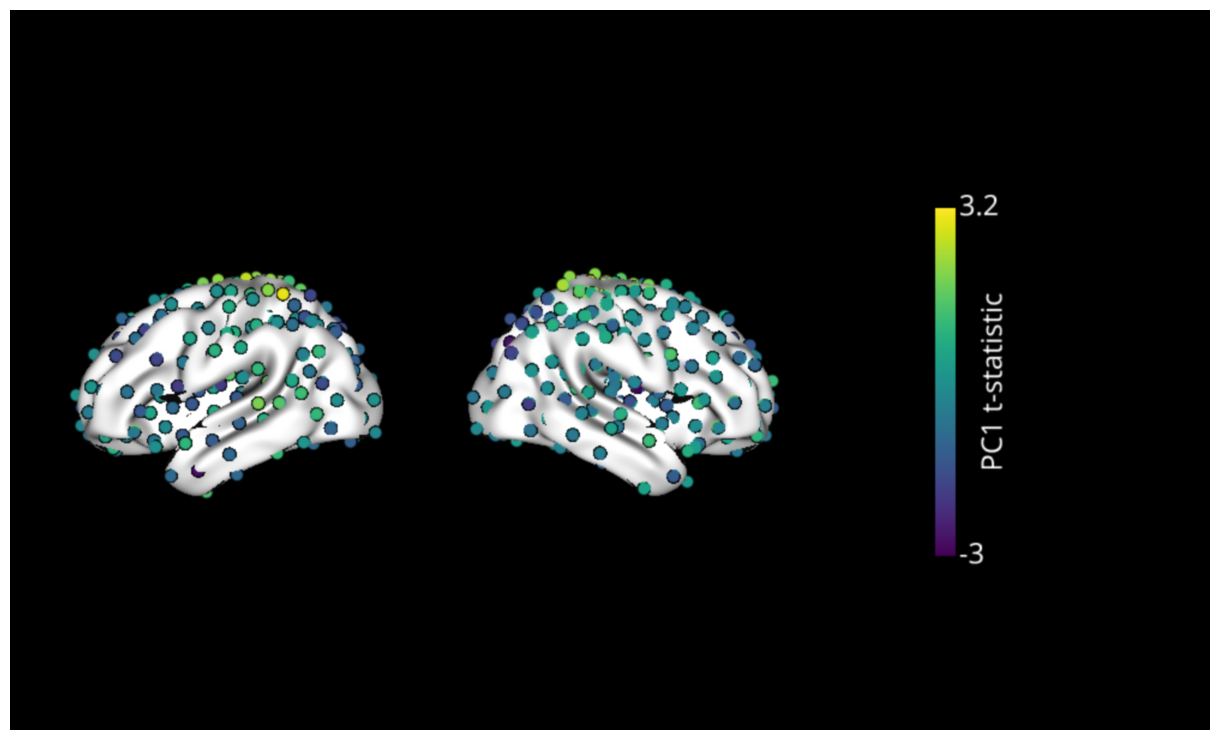

In [26]:
add_B3_to_scene(scene=SC_tt_PC1_outer, data=PC1_LowHighInt["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC1_outer, data=PC1_LowHighInt["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_tt_PC1_outer, data=PC1_LowHighInt["t_statistic"], row=0, col=2, cbtitle="PC1 t-statistic")

SC_tt_PC1_outer.preview()
#SC_tt_PC1_outer = RemoveBackground(SC_tt_PC1_outer)
#plt.imshow(SC_tt_PC1_outer)
#plt.show()


SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


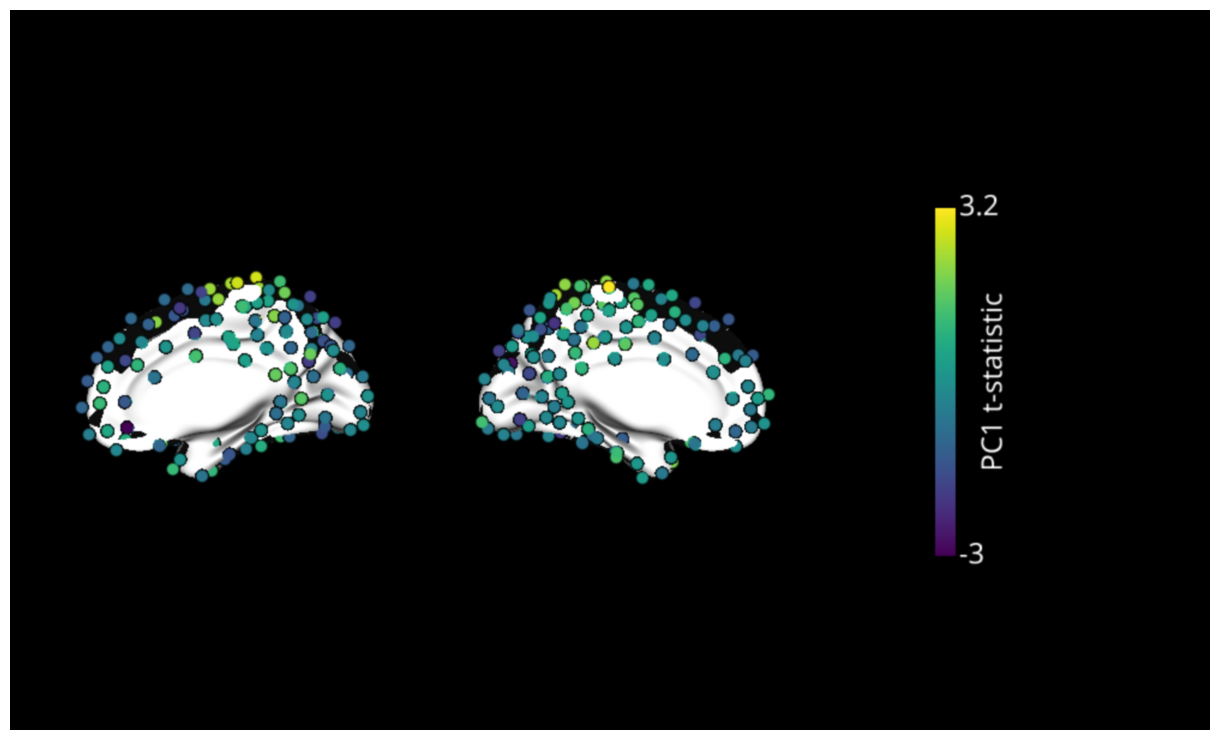

In [27]:
add_B3_to_scene(scene=SC_tt_PC1_inner, data=PC1_LowHighInt["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC1_inner, data=PC1_LowHighInt["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_tt_PC1_inner, data=PC1_LowHighInt["t_statistic"], row=0, col=2, cbtitle="PC1 t-statistic")

SC_tt_PC1_inner.preview()


### Brain-plot WCS1 LowHighInterference t-statistics 

In [28]:
# Create Scene 
SC_tt_WCS1_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS1_inner = SceneObj(bgcolor='black', size=(1000, 600))


Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


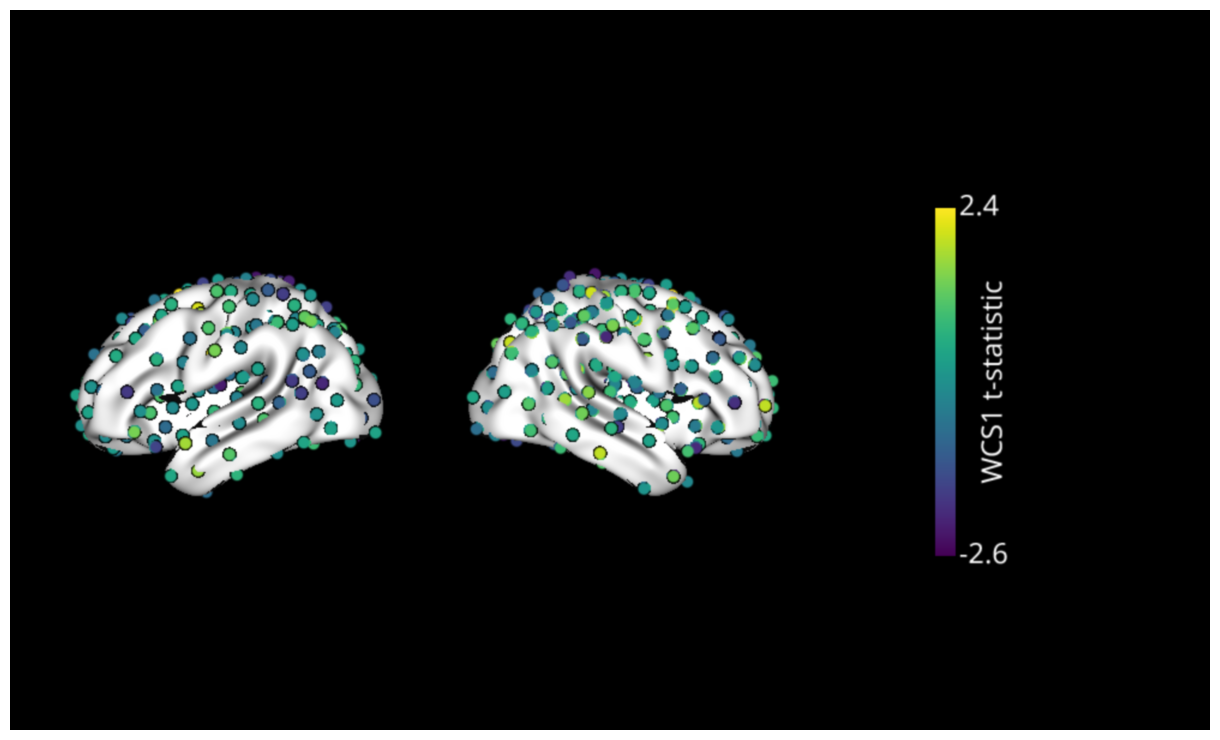

In [29]:
add_B3_to_scene(scene=SC_tt_WCS1_outer, data=WCS1_LowHighInt["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS1_outer, data=WCS1_LowHighInt["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_tt_WCS1_outer, data=WCS1_LowHighInt["t_statistic"], row=0, col=2, cbtitle="WCS1 t-statistic")

SC_tt_WCS1_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


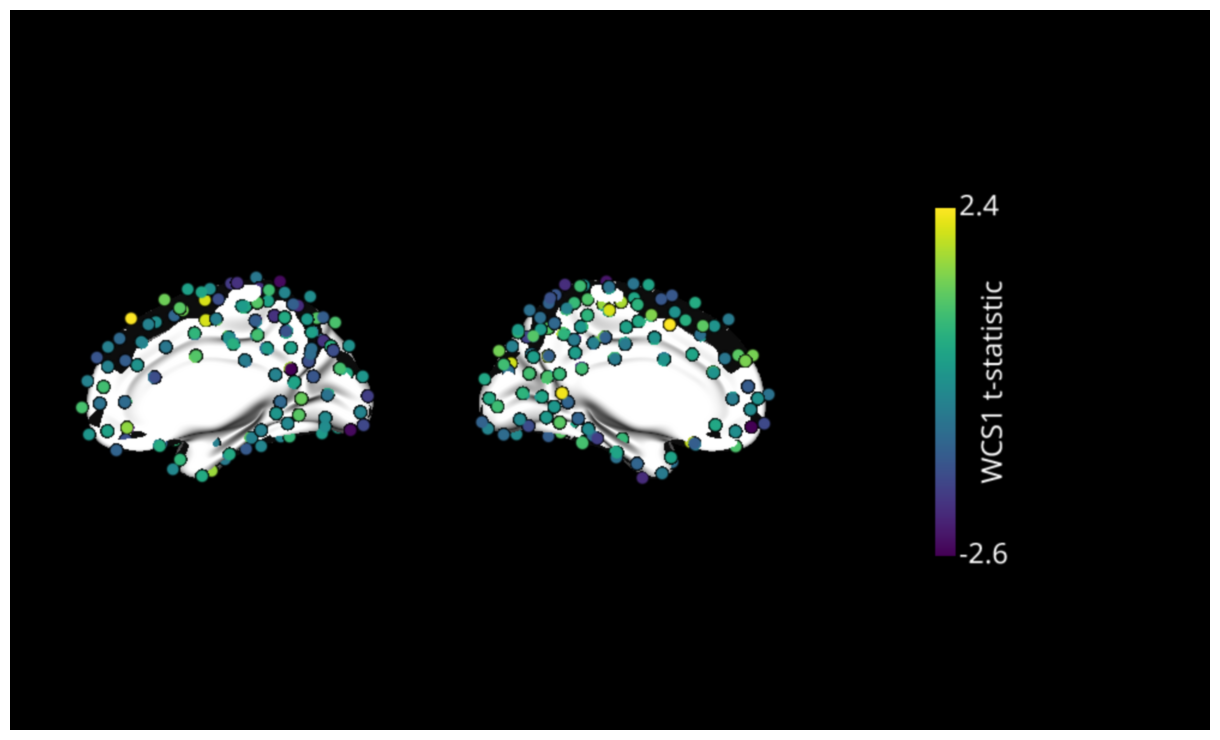

In [30]:
add_B3_to_scene(scene=SC_tt_WCS1_inner, data=WCS1_LowHighInt["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS1_inner, data=WCS1_LowHighInt["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_tt_WCS1_inner, data=WCS1_LowHighInt["t_statistic"], row=0, col=2, cbtitle="WCS1 t-statistic")

SC_tt_WCS1_inner.preview()



### Brain-plot PC2 LowHighInterference t-statistics 

In [31]:
# Create Scene 
SC_tt_PC2_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC2_inner = SceneObj(bgcolor='black', size=(1000, 600))

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


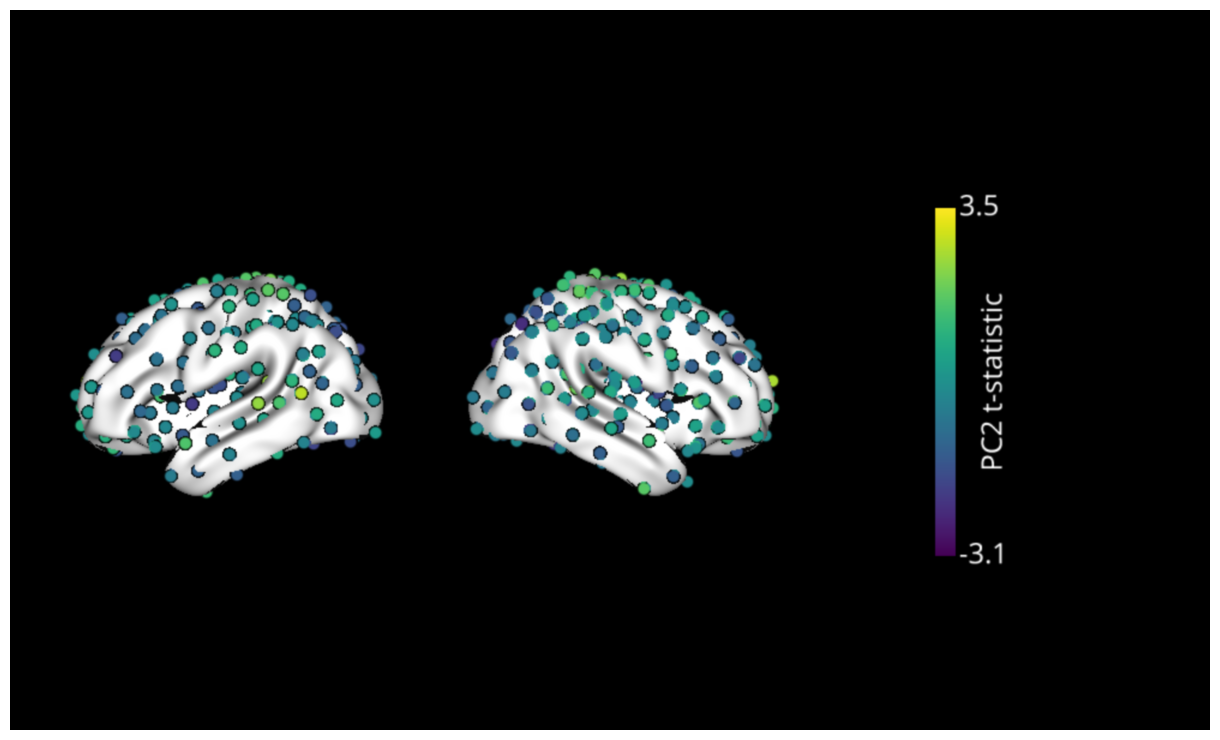

In [32]:
add_B3_to_scene(scene=SC_tt_PC2_outer, data=PC2_LowHighInt["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_PC2_outer, data=PC2_LowHighInt["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_tt_PC2_outer, data=PC2_LowHighInt["t_statistic"], row=0, col=2, cbtitle="PC2 t-statistic")

SC_tt_PC2_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


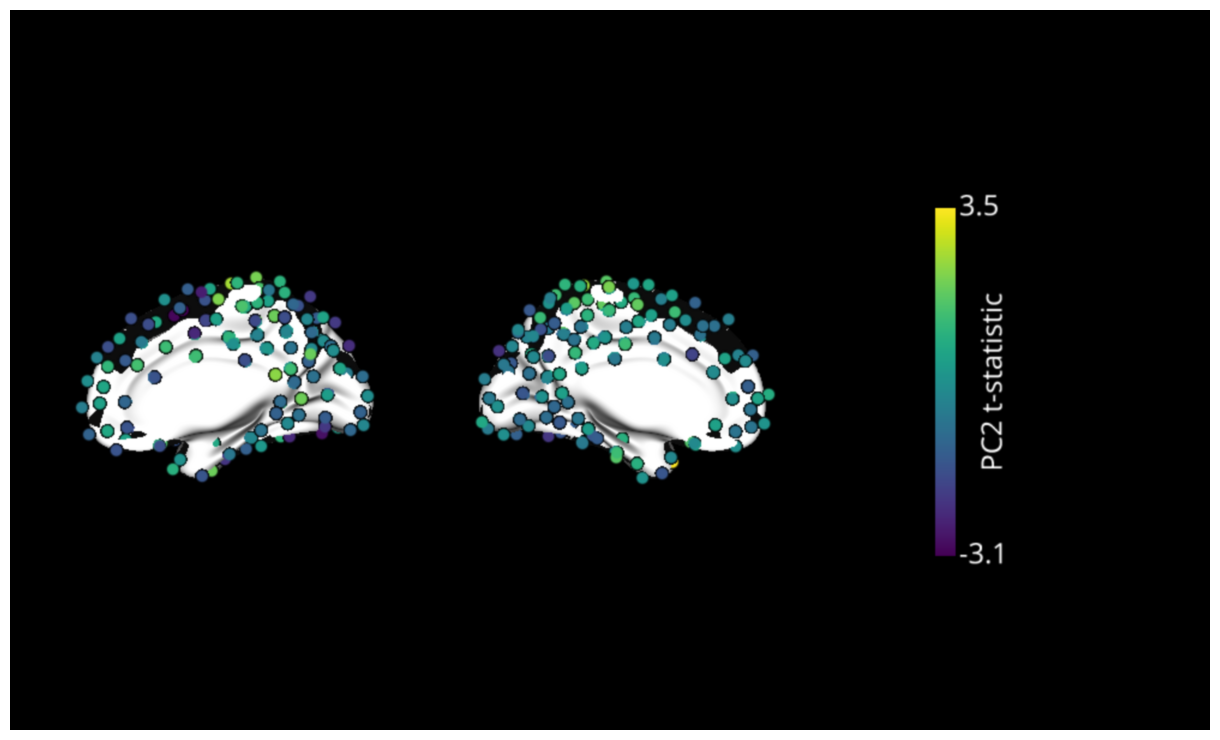

In [33]:
add_B3_to_scene(scene=SC_tt_PC2_inner, data=PC2_LowHighInt["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_PC2_inner, data=PC2_LowHighInt["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_tt_PC2_inner, data=PC2_LowHighInt["t_statistic"], row=0, col=2, cbtitle="PC2 t-statistic")

SC_tt_PC2_inner.preview()

### Brain-plot WCS2 LowHighInterference t-statistics 

In [34]:
# Create Scene 
SC_tt_WCS2_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS2_inner = SceneObj(bgcolor='black', size=(1000, 600))


Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


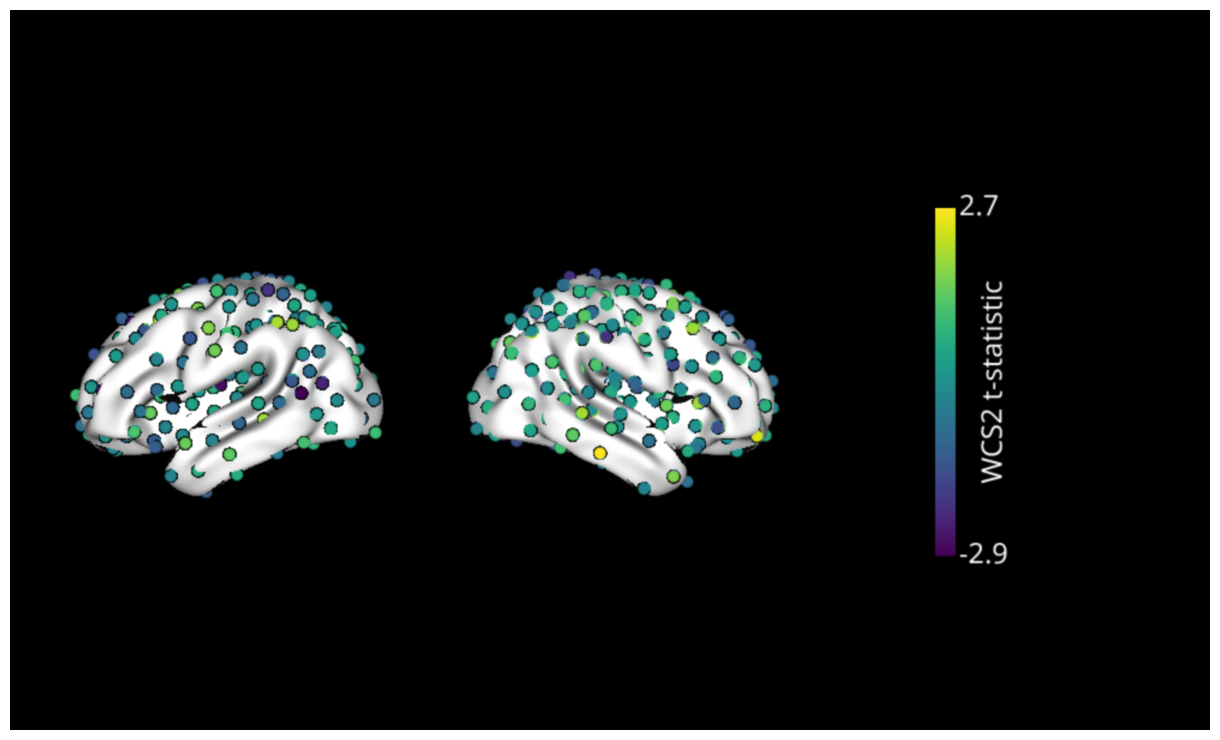

In [35]:
add_B3_to_scene(scene=SC_tt_WCS2_outer, data=WCS2_LowHighInt["t_statistic"], coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS2_outer, data=WCS2_LowHighInt["t_statistic"], coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_tt_WCS2_outer, data=WCS2_LowHighInt["t_statistic"], row=0, col=2, cbtitle="WCS2 t-statistic")

SC_tt_WCS2_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
    Color SourceExample using a data vector
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


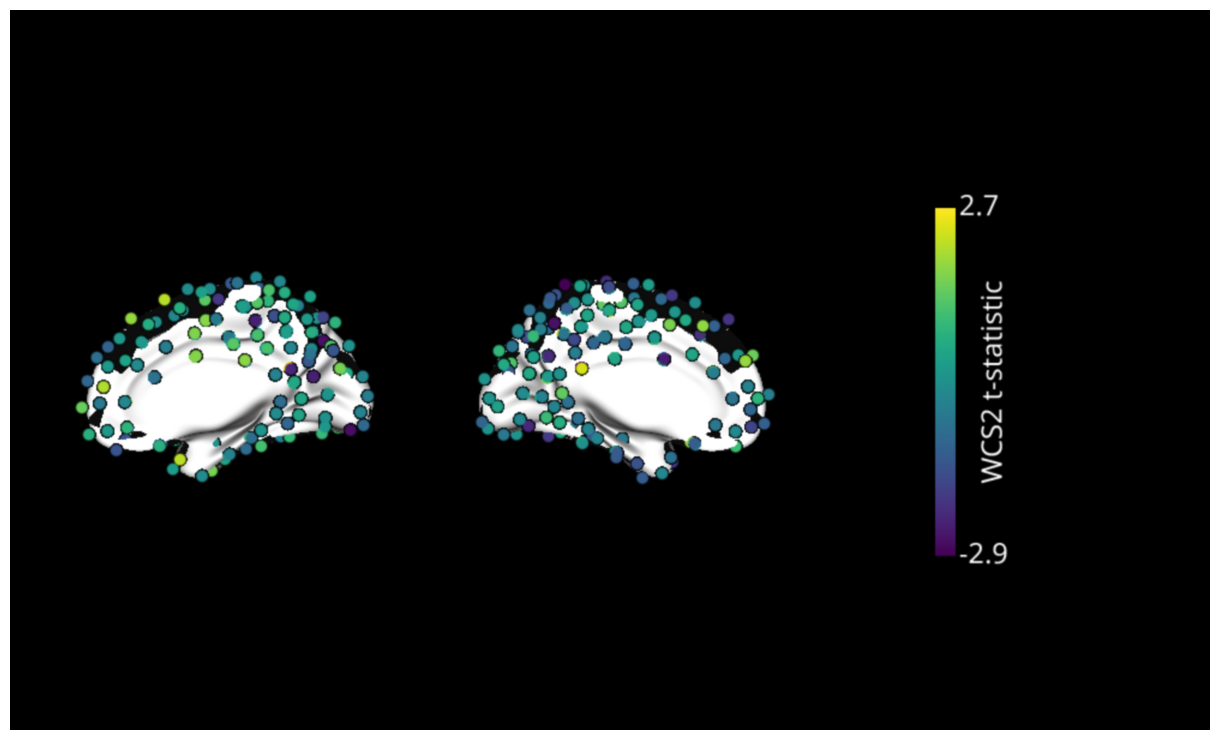

In [36]:
add_B3_to_scene(scene=SC_tt_WCS2_inner, data=WCS2_LowHighInt["t_statistic"][0:200], coords=coordinates_right, row=0, col=0, hemisphere='right', orientation='left')
add_B3_to_scene(scene=SC_tt_WCS2_inner, data=WCS2_LowHighInt["t_statistic"][200:400], coords=coordinates_left, row=0, col=1, hemisphere='left', orientation='right')
add_CB_to_scene(scene=SC_tt_WCS2_inner, data=WCS2_LowHighInt["t_statistic"], row=0, col=2, cbtitle="WCS2 t-statistic")

SC_tt_WCS2_inner.preview()

# Plotting significant t-values accross conditions

### Brain-plot PC1 LowHighInterference t-statistics 

In [37]:
# Create Scene 
SC_tt_PC1_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC1_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


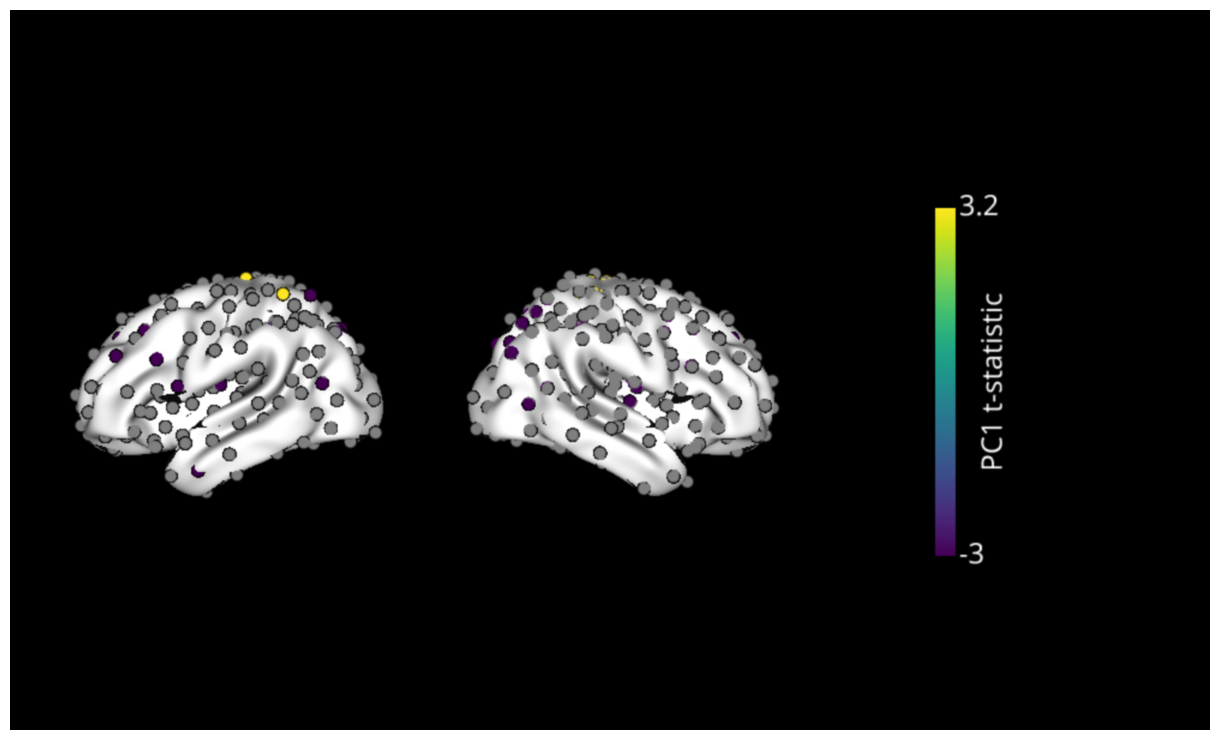

In [38]:
add_B3_to_scene_thrh1(scene=SC_tt_PC1_outer, data=PC1_LowHighInt, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene_thrh1(scene=SC_tt_PC1_outer, data=PC1_LowHighInt, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_tt_PC1_outer, data=PC1_LowHighInt["t_statistic"], row=0, col=2, cbtitle="PC1 t-statistic")

SC_tt_PC1_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


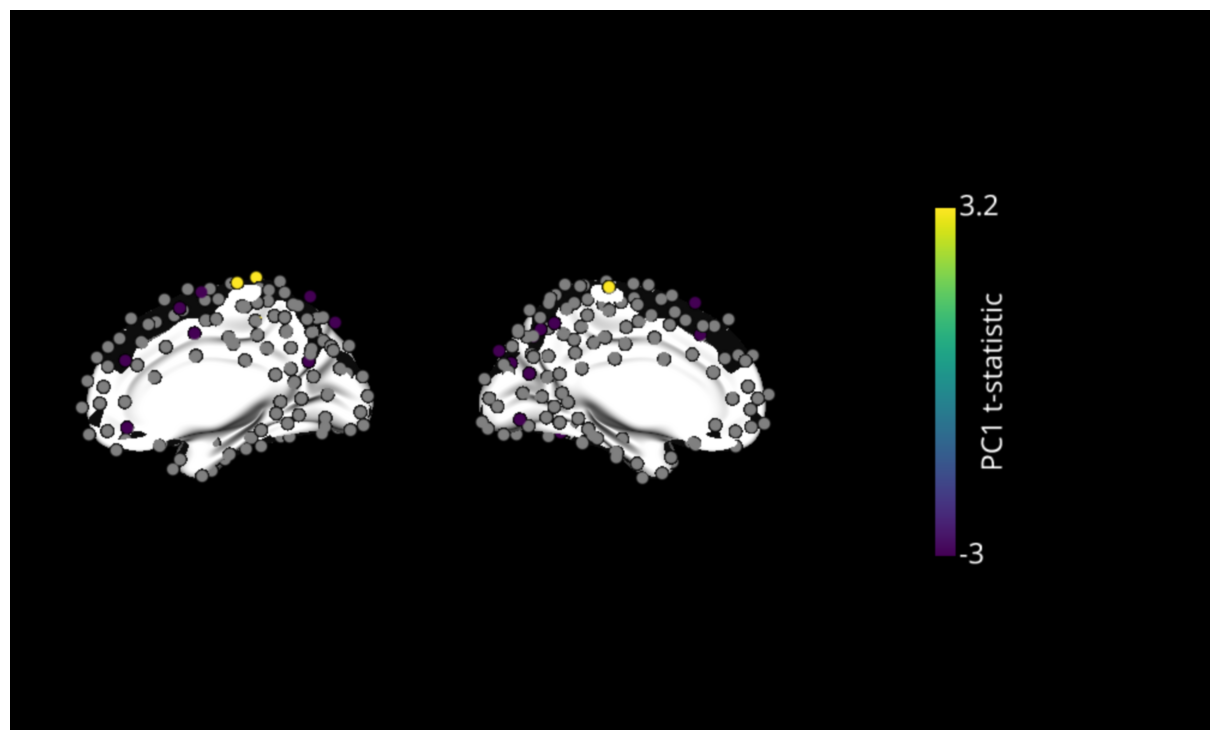

In [39]:
add_B3_to_scene_thrh2(scene=SC_tt_PC1_inner, data=PC1_LowHighInt, coords=coordinates)
add_CB_to_scene(scene=SC_tt_PC1_inner, data=PC1_LowHighInt["t_statistic"], row=0, col=2, cbtitle="PC1 t-statistic")

SC_tt_PC1_inner.preview()

### Brain-plot WCS1 LowHighInterference t-statistics 

In [40]:
# Create Scene 
SC_tt_WCS1_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS1_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


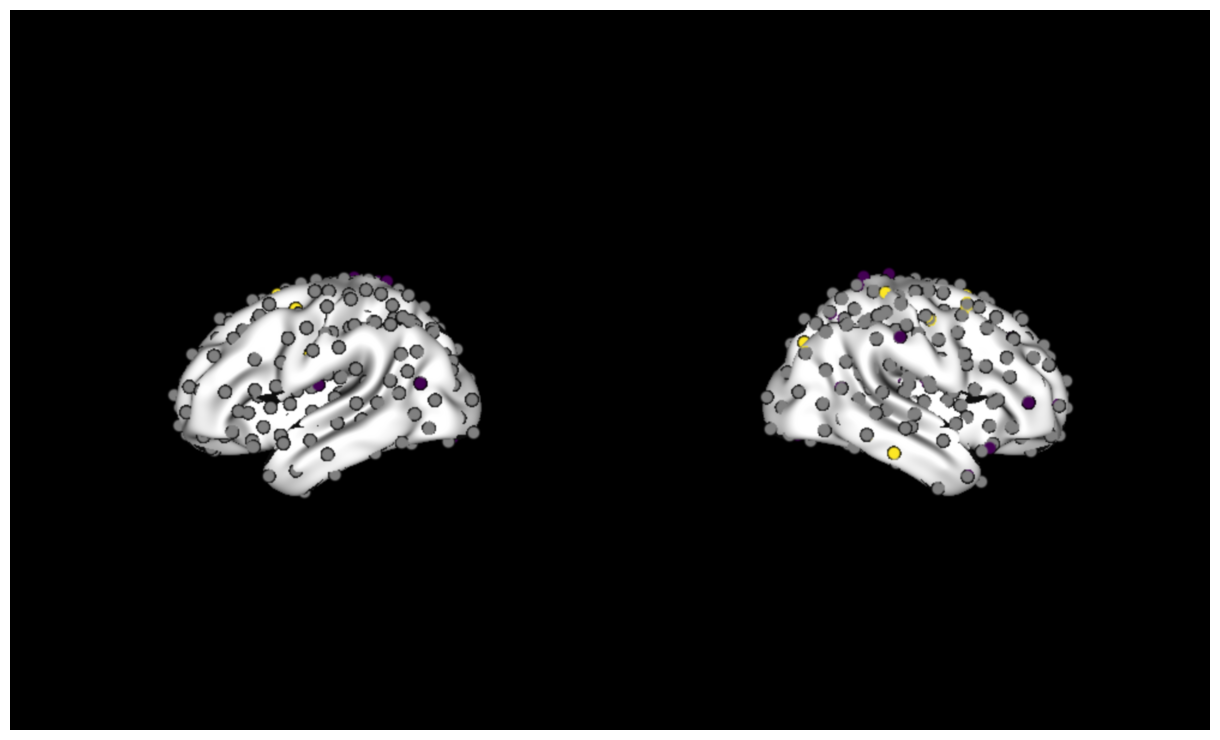

In [41]:
add_B3_to_scene_thrh1(scene=SC_tt_WCS1_outer, data=WCS1_LowHighInt, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene_thrh1(scene=SC_tt_WCS1_outer, data=WCS1_LowHighInt, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_tt_PC1_outer, data=PC1_LowHighInt["t_statistic"], row=0, col=2, cbtitle="WCS1 t-statistic")

SC_tt_WCS1_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


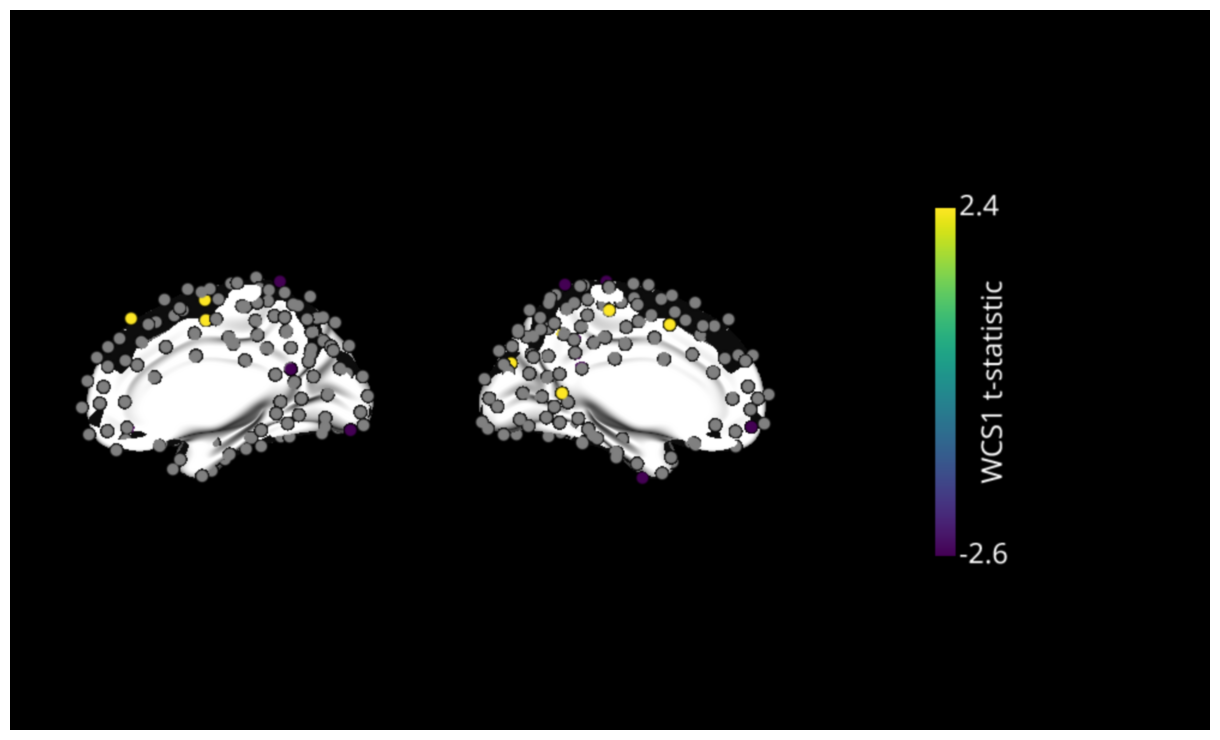

In [42]:
add_B3_to_scene_thrh2(scene=SC_tt_WCS1_inner, data=WCS1_LowHighInt, coords=coordinates)
add_CB_to_scene(scene=SC_tt_WCS1_inner, data=WCS1_LowHighInt["t_statistic"], row=0, col=2, cbtitle="WCS1 t-statistic")

SC_tt_WCS1_inner.preview()

### Brain-plot PC2 LowHighInterference t-statistics 

In [43]:
# Create Scene 
SC_tt_PC2_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_PC2_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


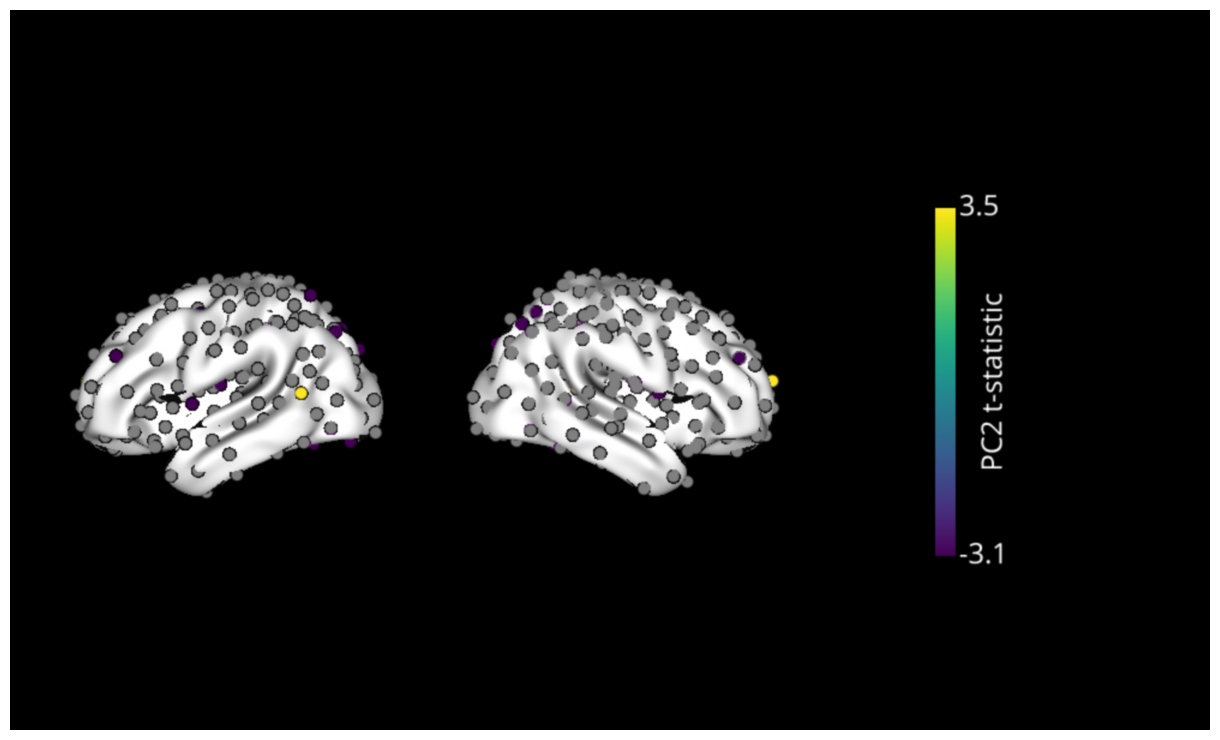

In [44]:
add_B3_to_scene_thrh1(scene=SC_tt_PC2_outer, data=PC2_LowHighInt, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene_thrh1(scene=SC_tt_PC2_outer, data=PC2_LowHighInt, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_tt_PC2_outer, data=PC2_LowHighInt["t_statistic"], row=0, col=2, cbtitle="PC2 t-statistic")

SC_tt_PC2_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


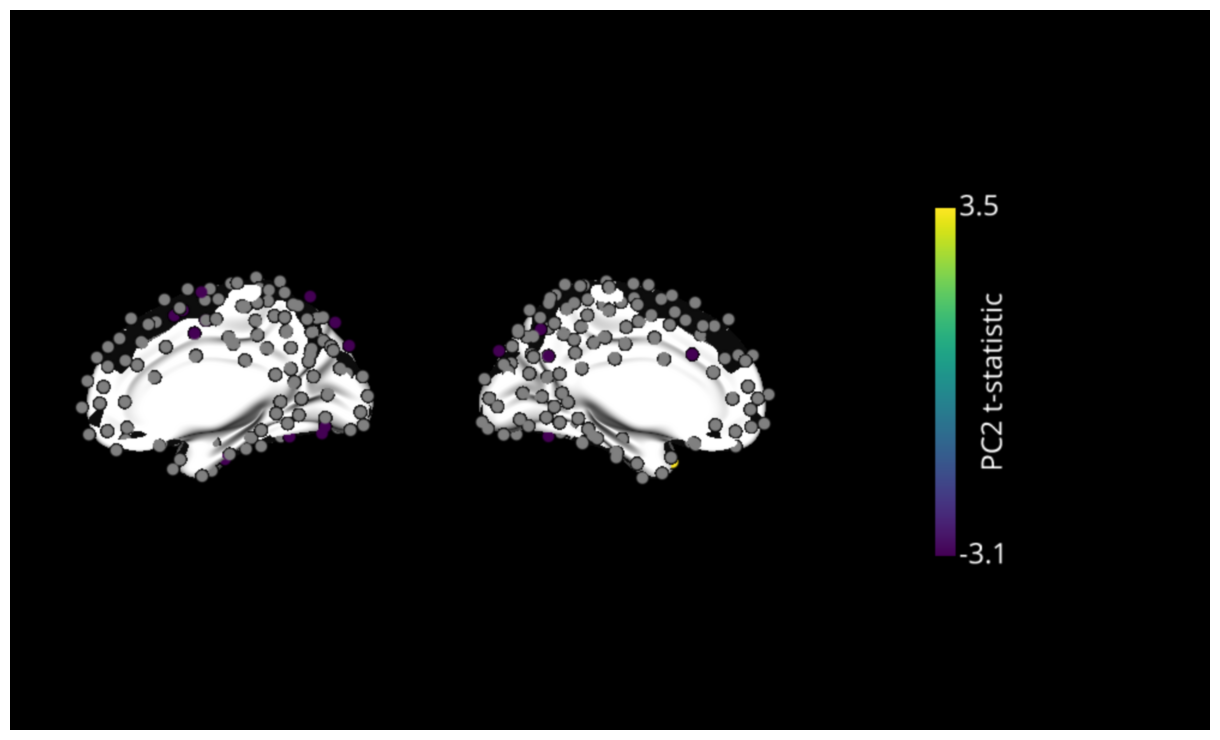

In [45]:
add_B3_to_scene_thrh2(scene=SC_tt_PC2_inner, data=PC2_LowHighInt, coords=coordinates)
add_CB_to_scene(scene=SC_tt_PC2_inner, data=PC2_LowHighInt["t_statistic"], row=0, col=2, cbtitle="PC2 t-statistic")

SC_tt_PC2_inner.preview()

### Brain-plot WCS2 LowHighInterference t-statistics 

In [46]:
# Create Scene 
SC_tt_WCS2_outer = SceneObj(bgcolor='black', size=(1000, 600))
SC_tt_WCS2_inner = SceneObj(bgcolor='black', size=(1000, 600))

# Default parameters 
KW = dict(title_size=14., zoom=1)

Creation of a scene
Creation of a scene


SourceObj(name='SourceExample') created
    400 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    400 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


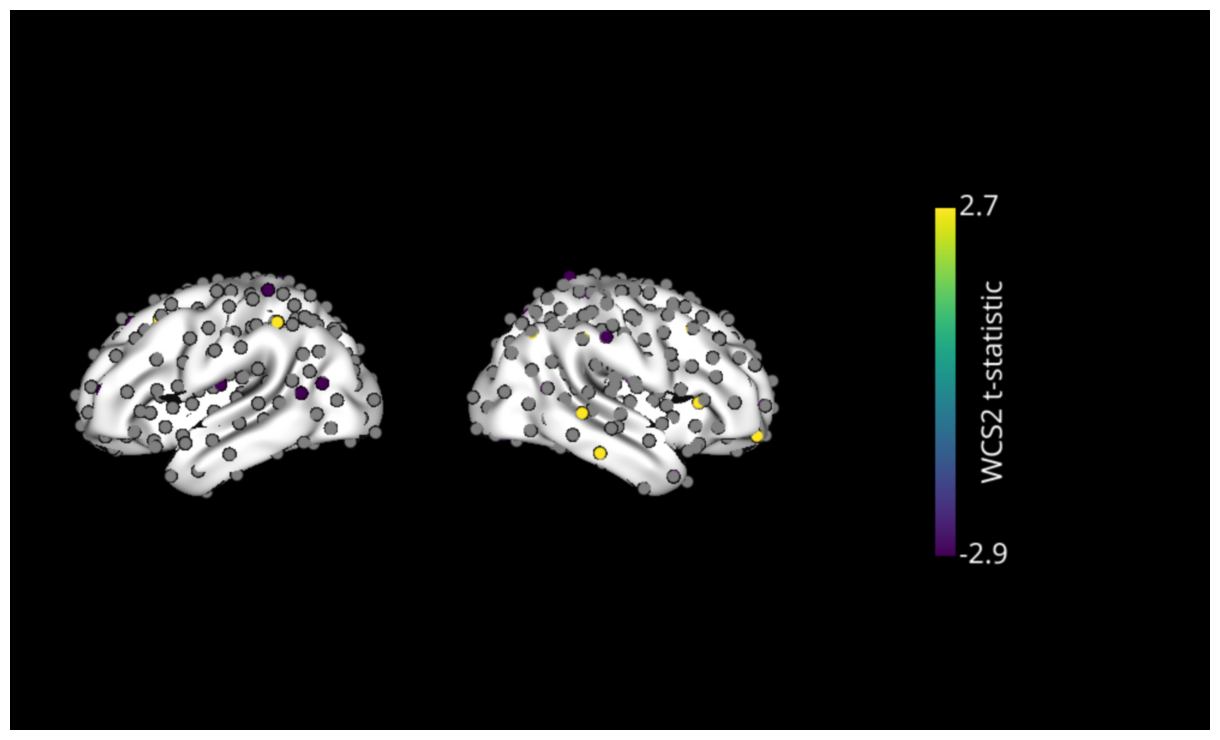

In [47]:
add_B3_to_scene_thrh1(scene=SC_tt_WCS2_outer, data=WCS2_LowHighInt, coords=coordinates, row=0, col=0, hemisphere='both', orientation='left')
add_B3_to_scene_thrh1(scene=SC_tt_WCS2_outer, data=WCS2_LowHighInt, coords=coordinates, row=0, col=1, hemisphere='both', orientation='right')
add_CB_to_scene(scene=SC_tt_WCS2_outer, data=WCS2_LowHighInt["t_statistic"], row=0, col=2, cbtitle="WCS2 t-statistic")

SC_tt_WCS2_outer.preview()

SourceObj(name='SourceExample') created
    200 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
SourceObj(name='SourceExample') created
    200 sources detected
BrainObj(name='B3') created
    SourceObj(name='SourceExample') added to the scene
    BrainObj(name='B3') added to the scene
Get colorbar properties from SourceObj(name='SourceExample') object
ColorbarObj(name='SourceExampleCbar') created
    ColorbarObj(name='SourceExampleCbar') added to the scene
WARNING | dpi parameter is not active if `print_size` is None. Use for example `print_size=(5, 5)`


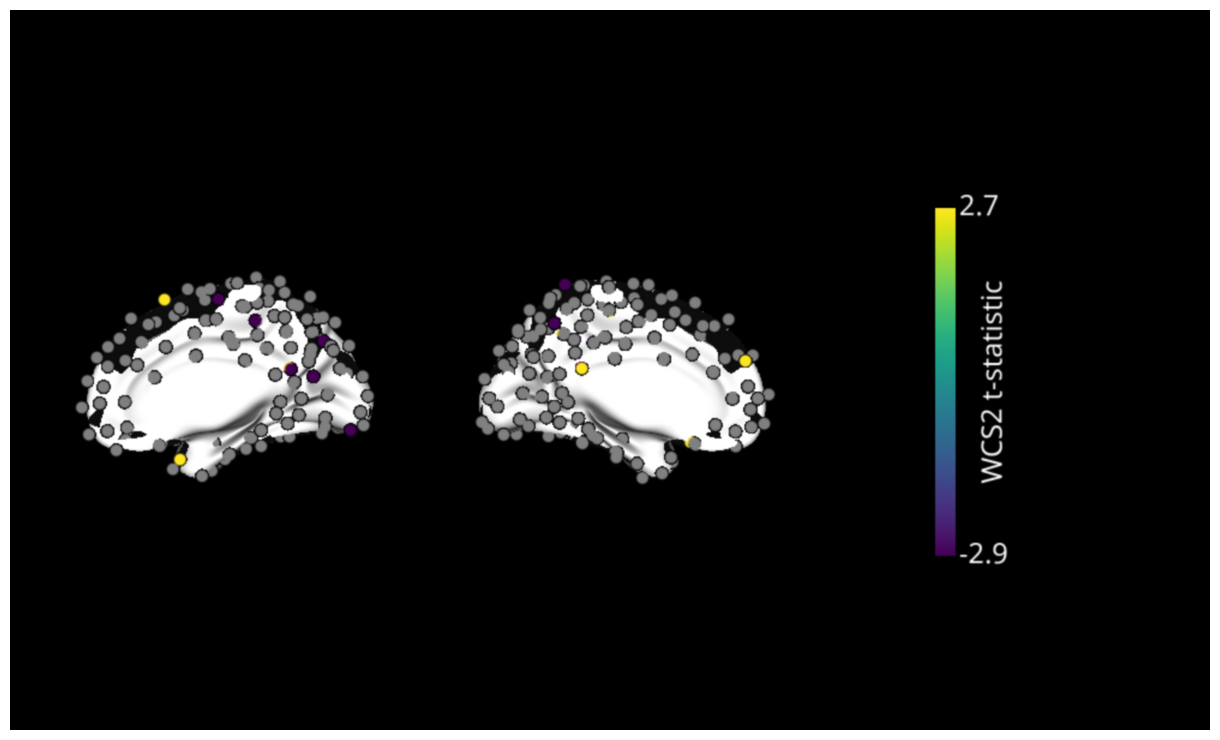

In [48]:
add_B3_to_scene_thrh2(scene=SC_tt_WCS2_inner, data=WCS2_LowHighInt, coords=coordinates)
add_CB_to_scene(scene=SC_tt_WCS2_inner, data=WCS2_LowHighInt["t_statistic"], row=0, col=2, cbtitle="WCS2 t-statistic")

SC_tt_WCS2_inner.preview()